## Tuz ve karabiber gürültüsünü (salt & pepper noise) giderme

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from utils import konvolusyon, medyan_filtre, gauss_kernel_olustur

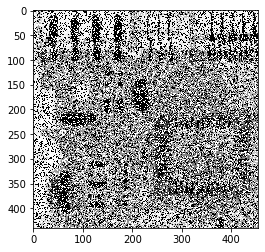

In [2]:
foto = cv2.imread("./fotograflar/salt_and_pepper.tif", 0)

plt.imshow(foto, cmap="gray")
plt.show()

In [6]:
sigmalar = [1, 3, 5]
gauss_cikis = []
for sigma in sigmalar:
    m = n = 6*sigma + 1
    gauss_kernel = gauss_kernel_olustur(m, n, K=1, sigma=sigma)
    gauss_cikis.append(konvolusyon(foto, gauss_kernel))

In [8]:
medyan_filtre_boyutlari = [3, 5, 7]
medyan_cikis = []
for medyan_filtre_boyutu in medyan_filtre_boyutlari:
    m = n = medyan_filtre_boyutu
    medyan_cikis.append(medyan_filtre(foto, m, n))

In [9]:
foto_boyutu = (448, 448)

ilk_sira = np.hstack([cv2.resize(cikis, foto_boyutu) for cikis in [foto, *gauss_cikis]])
ikinci_sira = np.hstack([cv2.resize(cikis, foto_boyutu) for cikis in [foto, *medyan_cikis]])

altalta = np.vstack((ilk_sira, ikinci_sira))

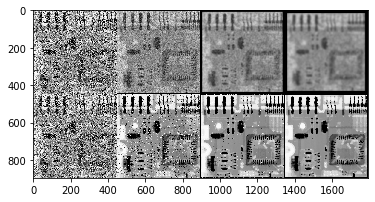

In [10]:
plt.imshow(altalta, cmap="gray")
plt.show()